In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/iris")

print("Path to dataset files:", path)

ModuleNotFoundError: No module named 'kagglehub'

In [5]:
import pandas as pd

iris_df = pd.read_csv(r"D:\sam_py_course\July 20\datasets\Iris zip\Iris.csv")

In [6]:
iris_df.shape

(150, 6)

In [13]:
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
iris_df = iris_df.drop(['Id'],axis=1)

KeyError: "['Id'] not found in axis"

In [15]:
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Target variable

In [16]:

iris_df['Species'].nunique()

3

# Drop Duplicates

In [17]:
iris_df.duplicated().sum()

3

In [18]:
iris_df = iris_df.drop_duplicates().reset_index(drop=True)

In [19]:
iris_df.shape

(147, 5)

# Missing Values

In [20]:
iris_df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Outliers

In [21]:
sns.boxplot(y=iris_df['SepalLengthCm'])
plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()  

sns.boxplot(y=iris_df['SepalWidthCm'])
plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()  

sns.boxplot(y=iris_df['PetalLengthCm'])
plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()  

sns.boxplot(y=iris_df['PetalWidthCm'])
plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()  

NameError: name 'sns' is not defined

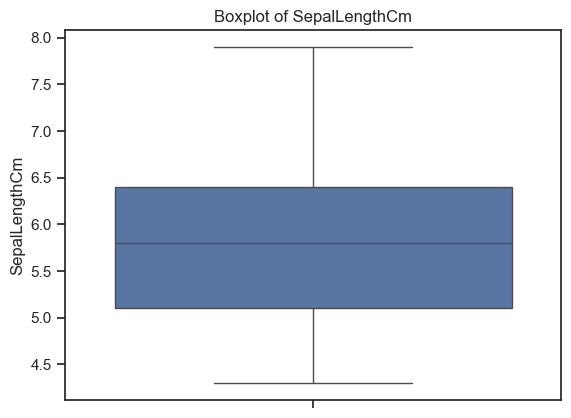

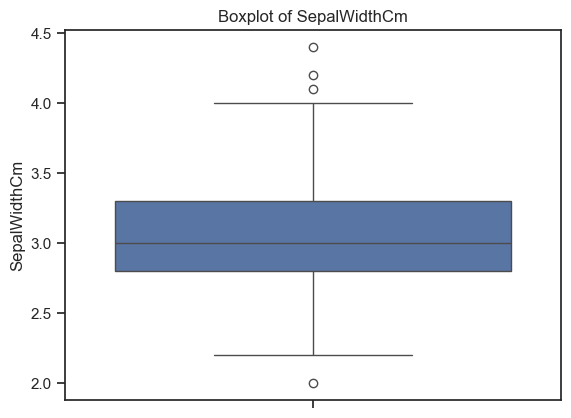

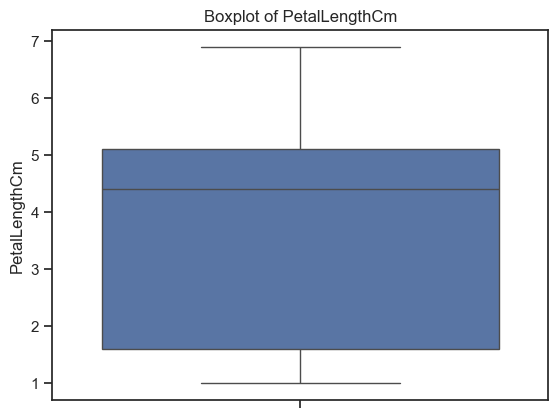

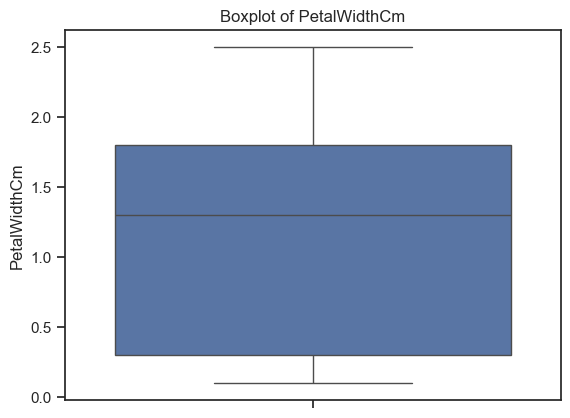

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
sns.set(style='ticks')

# plt.figure(figsize=(3,2))
for col in numeric_cols:
    sns.boxplot(y=iris_df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()  

# Model Building

In [22]:
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [23]:
data = iris_df.copy()

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier  # You can also use LogisticRegression, etc.
from sklearn.metrics import accuracy_score, classification_report

In [25]:
data = iris_df.copy()

In [26]:
data.describe(include='all')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,147.000000,147.000000,147.000000,147.000000,147
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-versicolor
freq,NaN,NaN,NaN,NaN,50
mean,5.856463,3.055782,3.780272,1.208844,NaN
std,0.829100,0.437009,1.759111,0.757874,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.400000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [30]:
le = LabelEncoder()
data['Species'] = le.fit_transform(data['Species'])

In [33]:
X = data.drop('Species', axis=1)  # Features
y = data['Species']              # Target

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()

In [36]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [37]:
scaling_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
model = RandomForestClassifier()  # Or use LogisticRegression()
model.fit(X_train, y_train)

RandomForestClassifier()

In [41]:
y_pred = model.predict(X_test)

In [42]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9333333333333333
Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.89      0.89      0.89         9

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



# 

# 